<a href="https://colab.research.google.com/github/singh1811/Machine_learning_projects/blob/main/iris_dataset_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing basic Libraries




In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Loading dataset

In [4]:
dataset=load_iris()
print(dataset.data)
print(dataset.target)
print(dataset.data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

#Segregating dataset into X and Y 

In [5]:
data1=dataset.copy()
X= pd.DataFrame(dataset.data,columns=dataset.feature_names) #Input values
print(X)
Y= pd.DataFrame(dataset.target)#output or species class
Y

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


#Splitting dataset into Train and Test

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


#Finding best max_depth value for the model


In [7]:
accuracy=[]
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
for i in range(1,10):
  model=DecisionTreeClassifier(max_depth=i,random_state=0)
  model.fit(X_train,Y_train)
  pred=model.predict(X_test)
  score=accuracy_score(Y_test,pred)
  accuracy.append(score)
  


Text(0, 0.5, 'accuracy_score')

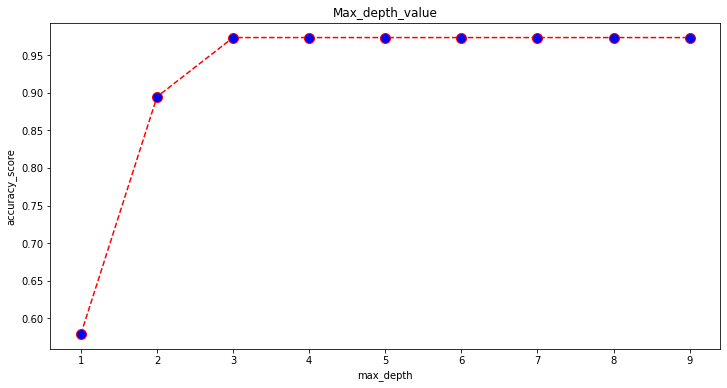

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(range(1,10),accuracy,color='red',linestyle='dashed',marker='o',markersize='10',markerfacecolor='blue')
plt.title('Max_depth_value')
plt.xlabel('max_depth')
plt.ylabel('accuracy_score')



> From here we can observe max_depth value as 3 is good






# Training our model 

In [12]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0) # taking max_depth value =3
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

#Predicting a class with new input data

In [13]:
sepal_length=float(input('Enter sepal_length: '))
sepal_width=float(input('Enter sepal_width: '))
petal_length=float(input('Enter peatl_length: '))
petal_width=float(input('Enter petal_width: '))
data1=[[sepal_length,sepal_width,petal_length,petal_width]]
result=model.predict(data1)
if result==0:
  print('Species is Setosa')
elif result==1:
  print('Species is vesicolor')
else:
  print('Species is virginica')


Enter sepal_length: 0.6
Enter sepal_width: 1.3
Enter peatl_length: 0.9
Enter petal_width: 1.8
Species is virginica


# **Confusion Matrix and Accuracy of the Model**

In [14]:
from sklearn.metrics import confusion_matrix
print('Confusion_Matrix ',confusion_matrix(Y_test,pred))
print('Accuracy of the model: {0}%'.format(accuracy_score(Y_test,pred)*100))


Confusion_Matrix  [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy of the model: 97.36842105263158%
